In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.30,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf=LogisticRegression(random_state=42)
rnd_clf=RandomForestClassifier(n_estimators=10,random_state=42)
svm_clf=SVC(random_state=42)
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(random_state=42))])

In [3]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.896
VotingClassifier 0.904


In [5]:
for i in range(50,120,5):
    print('logit:',log_clf.predict(X_test[i].reshape(-1,2)),end=",")
    print('rf:',rnd_clf.predict(X_test[i].reshape(-1,2)),end=",")
    print('svm:',svm_clf.predict(X_test[i].reshape(-1,2)),end=",")
    print('투표결과:',voting_clf.predict(X_test[i].reshape(-1,2)))
    

logit: [0],rf: [1],svm: [1],투표결과: [1]
logit: [0],rf: [0],svm: [0],투표결과: [0]
logit: [0],rf: [0],svm: [0],투표결과: [0]
logit: [0],rf: [0],svm: [0],투표결과: [0]
logit: [0],rf: [1],svm: [0],투표결과: [0]
logit: [0],rf: [0],svm: [0],투표결과: [0]
logit: [1],rf: [1],svm: [1],투표결과: [1]
logit: [1],rf: [0],svm: [1],투표결과: [1]
logit: [1],rf: [1],svm: [1],투표결과: [1]
logit: [1],rf: [1],svm: [1],투표결과: [1]
logit: [0],rf: [0],svm: [0],투표결과: [0]
logit: [0],rf: [0],svm: [0],투표결과: [0]
logit: [1],rf: [0],svm: [0],투표결과: [0]
logit: [0],rf: [0],svm: [0],투표결과: [0]


In [8]:
log_clf=LogisticRegression(random_state=45)
rnd_clf=RandomForestClassifier(n_estimators=10,random_state=45)
svm_clf=SVC(probability=True,random_state=45)
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='soft')
voting_clf.fit(X_train,y_train)

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.896
VotingClassifier 0.912


In [10]:
for i in range(50,120,5):
    print('logit:',log_clf.predict_proba(X_test[i].reshape(-1,2)),end=",")
    print('rf:',rnd_clf.predict_proba(X_test[i].reshape(-1,2)),end=",")
    print('svm:',svm_clf.predict_proba(X_test[i].reshape(-1,2)),end=",")
    print('투표결과:',voting_clf.predict_proba(X_test[i].reshape(-1,2)))

logit: [[0.67105751 0.32894249]],rf: [[0. 1.]],svm: [[0.16212751 0.83787249]],투표결과: [[0.27772834 0.72227166]]
logit: [[0.94711204 0.05288796]],rf: [[1. 0.]],svm: [[0.98772788 0.01227212]],투표결과: [[0.97827997 0.02172003]]
logit: [[0.96496435 0.03503565]],rf: [[1. 0.]],svm: [[0.97091195 0.02908805]],투표결과: [[0.97862543 0.02137457]]
logit: [[0.89421309 0.10578691]],rf: [[1. 0.]],svm: [[0.99273066 0.00726934]],투표결과: [[0.96231458 0.03768542]]
logit: [[0.50290369 0.49709631]],rf: [[0.4 0.6]],svm: [[0.93876697 0.06123303]],투표결과: [[0.61389022 0.38610978]]
logit: [[0.96213767 0.03786233]],rf: [[1. 0.]],svm: [[0.95469857 0.04530143]],투표결과: [[0.97227875 0.02772125]]
logit: [[0.11831104 0.88168896]],rf: [[0. 1.]],svm: [[0.0077023 0.9922977]],투표결과: [[0.04200445 0.95799555]]
logit: [[0.08196376 0.91803624]],rf: [[0. 1.]],svm: [[0.09941629 0.90058371]],투표결과: [[0.06046002 0.93953998]]
logit: [[0.02615125 0.97384875]],rf: [[0. 1.]],svm: [[0.00746312 0.99253688]],투표결과: [[0.01120479 0.98879521]]
logit: [[0

In [11]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train_val, X_test,y_train_val,t_test=train_test_split(mnist.data, mnist.target,
test_size=10000,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train_val,y_train_val,
test_size=10000,random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

random_forest_clf=RandomForestClassifier(n_estimators=10,random_state=42)
extra_trees_clf=ExtraTreesClassifier(n_estimators=10,random_state=42)
svm_clf=SVC(max_iter=10000,random_state=42)
mlp_clf=MLPClassifier(random_state=42)

estimators=[random_forest_clf, extra_trees_clf, svm_clf,mlp_clf]
for estimator in estimators:
    print("훈련 예측기:", estimator)
    estimator.fit(X_train[:1000],y_train[:1000])
[estimator.score(X_val[:1000],y_val[:1000]) for estimator in estimators ]


훈련 예측기: RandomForestClassifier(n_estimators=10, random_state=42)
훈련 예측기: ExtraTreesClassifier(n_estimators=10, random_state=42)
훈련 예측기: SVC(max_iter=10000, random_state=42)
훈련 예측기: MLPClassifier(random_state=42)


[0.802, 0.794, 0.906, 0.813]

In [14]:
named_estimators=[
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf",extra_trees_clf),
    ("svm_clf",svm_clf),
    ("mlp_clf",mlp_clf),
]

In [15]:
voting_clf=VotingClassifier(named_estimators)

In [19]:
voting_clf.fit(X_train[:1000],y_train[:1000])

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=10,
                                                   random_state=42)),
                             ('svm_clf', SVC(max_iter=10000, random_state=42)),
                             ('mlp_clf', MLPClassifier(random_state=42))])

In [20]:
voting_clf.score(X_val[:1000], y_val[:1000])

0.873

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X,y=make_moons(n_samples=500, noise=0.3, random_state=10)
X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=10)



In [49]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(random_state=42),n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1,random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.84


In [30]:
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred_tree=tree_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_tree))

0.856


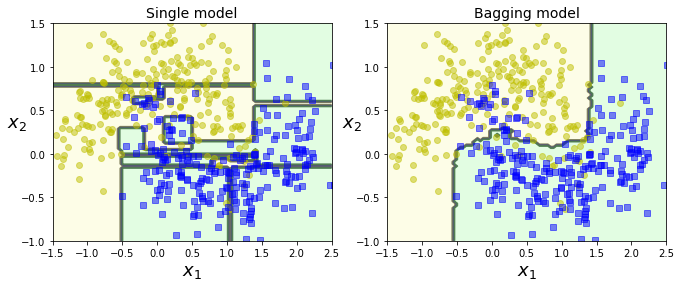

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Single model", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Bagging model", fontsize=14)
plt.show()
#단일모델은 과적합화 된 모형이고 오른쪽의 배깅모형은 일반화된 모형    

In [50]:
from sklearn.metrics import accuracy_score
bag_clf=BaggingClassifier(DecisionTreeClassifier(splitter="random",
max_leaf_nodes=16, random_state=42),n_estimators=500,max_samples=1.0,bootstrap=True,
n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.84

In [51]:
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,
random_state=42)
rnd_clf.fit(X_train,y_train)
y_pred_rf=rnd_clf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.84

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500,
n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"],
rnd_clf.feature_importances_):
    print(name, score)


sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [53]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,bootstrap=True,n_jobs=-1,oob_score=True, random_state=40
)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.8986666666666666

In [54]:
bag_clf.oob_decision_function_[:5]

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.99468085, 0.00531915],
       [1.        , 0.        ],
       [0.15934066, 0.84065934]])

In [55]:
from sklearn.metrics import accuracy_score
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.832

In [56]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
rnd_clf=RandomForestClassifier(n_estimators=10,random_state=42)
rnd_clf.fit(mnist["data"],mnist["target"])

RandomForestClassifier(n_estimators=10, random_state=42)

In [57]:
import matplotlib
def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image,cmap=matplotlib.cm.hot,interpolation="nearest")
    plt.axis("off")

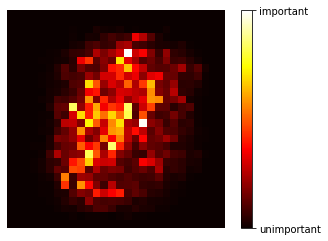

In [58]:
plot_digit(rnd_clf.feature_importances_)
cbar=plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['unimportant','important'])
plt.show()

In [59]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    learning_rate=0.5,random_state=42
)
ada_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.832